<a href="https://colab.research.google.com/github/arindamroy-eng/Pytorch-and-other-ML-Experiments/blob/main/DNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F

In [ ]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

training_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
training_loader = DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)

validation_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)





In [ ]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  # Swap (1,28,28) to (28, 28, 1)
  image = image.transpose(1,2,0)
  #print(image)
  #normalize. Image data ranges form 0-255. Convert to range -1 to 1
  image = image + np.array((0.5, 0,.5,0.5)) + np.array((0.5, 0,.5,0.5))
  # limit all the values between 0 and 1
  image = image.clip(0,1)

  return image

torch.Size([1, 28, 28]) tensor(1)


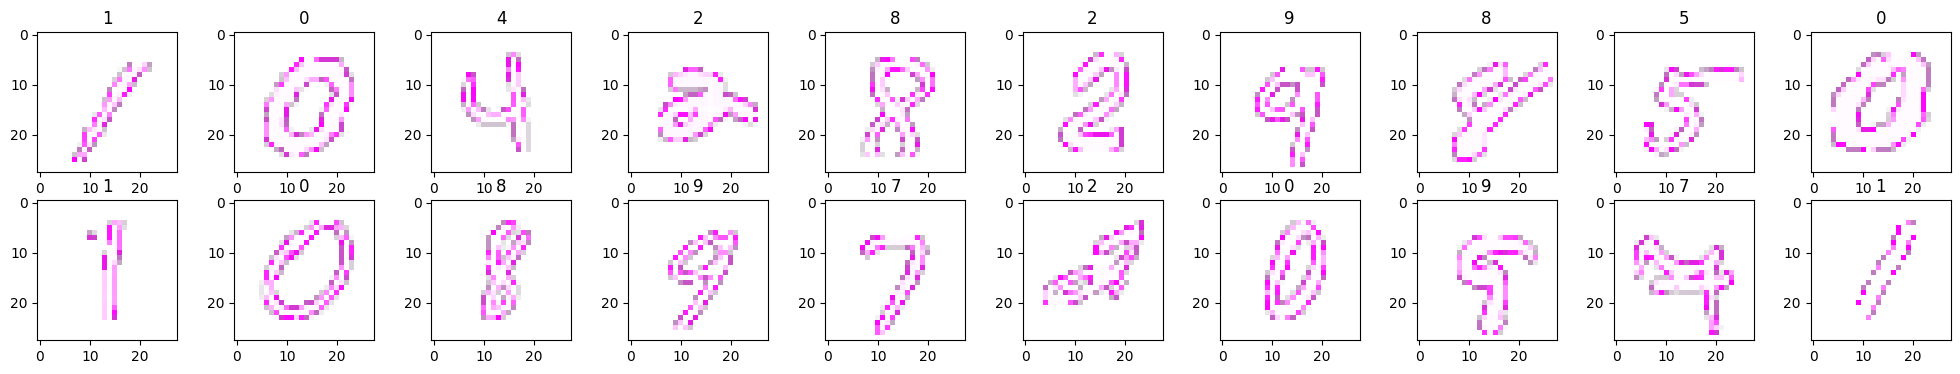

In [ ]:
dataiter = iter(training_loader)
images, labels = next(dataiter)
print(images[0].size(), labels[0])

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1)
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())



In [ ]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)

  def forward (self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    # No softmax here for multi classification
    x = self.linear3(x) # Often called score to calculate nn.CrossEntropyLoss
    return x

model = Classifier(28*28, 125, 65, 10)

model


Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)



In [ ]:
epochs = 12
running_loss_history = []
running_corrects_history = []

val_running_loss_history = []
val_running_loss_corrects = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)
    running_loss += loss.item()
  else:
    with torch.no_grad():
        for val_inputs, val_labels in validation_loader:
          val_inputs = val_inputs.view(inputs.shape[0], -1)
          val_outputs = model(val_inputs)
          val_loss = criterion(val_outputs, val_labels)

          _, val_preds = torch.max(val_outputs, 1)
          val_running_loss += val_loss.item()
          val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss / len(training_loader)
    epoch_accuracy = running_corrects.float()/len(training_loader)
    running_corrects_history.append(epoch_accuracy)
    running_loss_history.append(epoch_loss)
    #print(f"training loss:{epoch_loss:.4f}, {epoch_accuracy.item():.4f}")
    val_epoch_loss = val_running_loss / len(validation_loader)
    val_epoch_accuracy = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_loss_corrects.append(val_epoch_accuracy)

    print(f"Epoch count:{e}")
    print(f"training loss:{epoch_loss:.4f}, {epoch_accuracy.item():.4f}")
    print(f"validation loss:{val_epoch_loss:.4f}, {val_epoch_accuracy.item():.4f}")


Epoch count:0
training loss:0.9607, 75.7100
validation loss:0.4283, 88.3500
Epoch count:1
training loss:0.3798, 89.3183
validation loss:0.3274, 90.8700
Epoch count:2
training loss:0.3184, 90.9033
validation loss:0.2861, 91.9100
Epoch count:3
training loss:0.2873, 91.6550
validation loss:0.2621, 92.4900
Epoch count:4
training loss:0.2625, 92.3983
validation loss:0.2459, 92.8900
Epoch count:5
training loss:0.2419, 93.0133
validation loss:0.2230, 93.3800
Epoch count:6
training loss:0.2220, 93.5667
validation loss:0.2105, 93.8400
Epoch count:7
training loss:0.2050, 94.0150
validation loss:0.1922, 94.1800
Epoch count:8
training loss:0.1901, 94.5000
validation loss:0.1801, 94.7400
Epoch count:9
training loss:0.1770, 94.8183
validation loss:0.1694, 94.9700
Epoch count:10
training loss:0.1648, 95.2333
validation loss:0.1606, 95.3000
Epoch count:11
training loss:0.1548, 95.5400
validation loss:0.1518, 95.4700


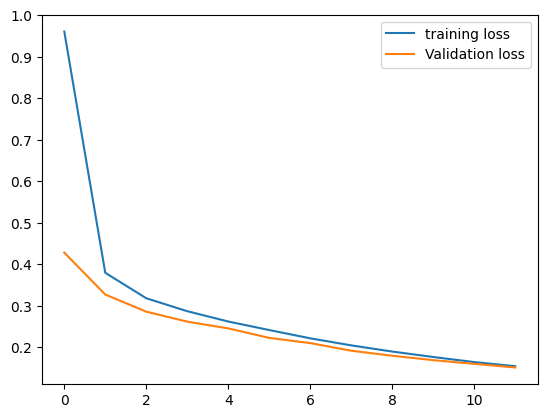

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='Validation loss')
plt.legend()

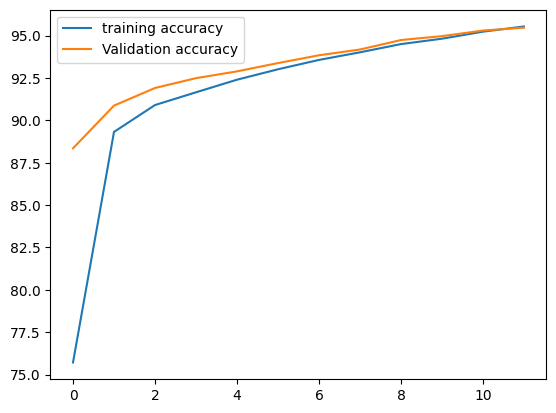

In [ ]:
plt.plot(running_corrects_history, label = 'training accuracy')
plt.plot(val_running_loss_corrects, label = 'Validation accuracy')
plt.legend()

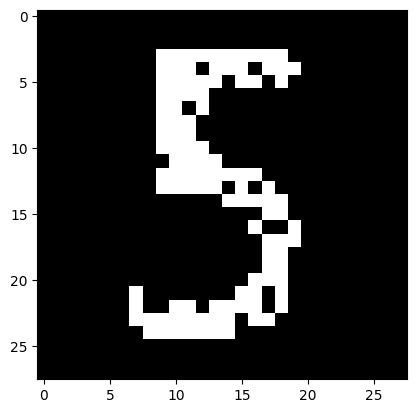

In [ ]:
import requests
from PIL import Image, ImageOps

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'

response = requests.get(url, stream = True)
#print(response)
img = Image.open(response.raw)
plt.imshow(img)

img = ImageOps.invert(img)
img = img.convert('1')
plt.imshow(img)
img = transform(img)
plt.imshow(im_convert(img))

In [ ]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)

print(pred.item())


5


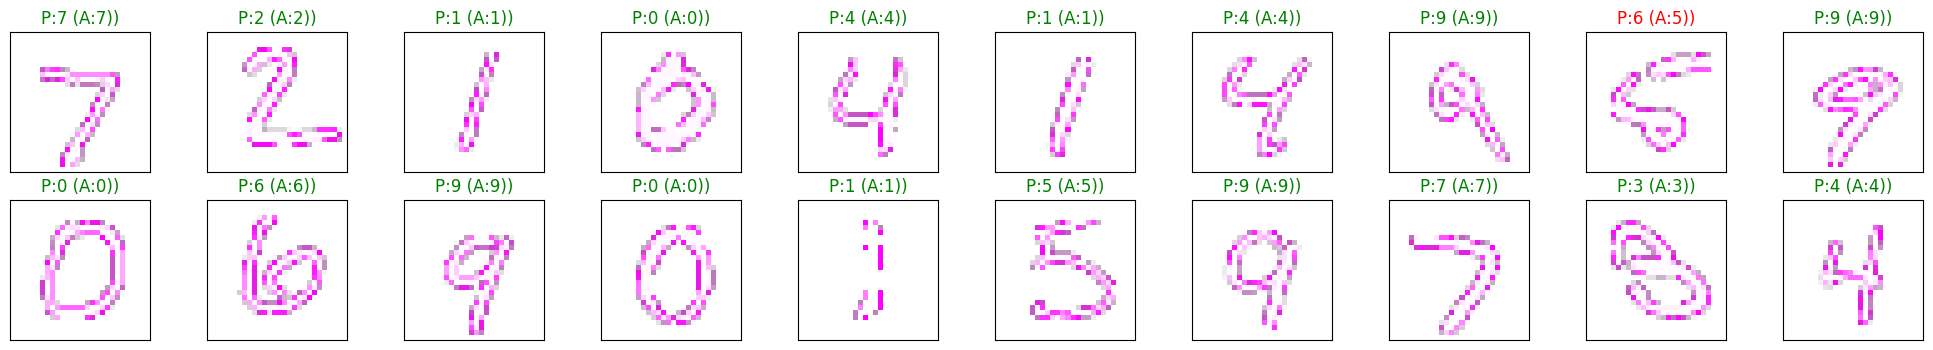

In [ ]:
dataiter = iter(validation_loader)
images, labels = next(dataiter)
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("P:{} (A:{}))".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx] == labels[idx] else "red"))


In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
linear1.weight 	 torch.Size([125, 784])
linear1.bias 	 torch.Size([125])
linear2.weight 	 torch.Size([65, 125])
linear2.bias 	 torch.Size([65])
linear3.weight 	 torch.Size([10, 65])
linear3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {0: {'step': tensor(7200.), 'exp_avg': tensor([[ 6.0652e-04,  6.0652e-04,  6.0652e-04,  ...,  6.0652e-04,
          6.0652e-04,  6.0652e-04],
        [-8.1466e-05, -8.1466e-05, -8.1466e-05,  ..., -8.1466e-05,
         -8.1466e-05, -8.1466e-05],
        [-5.6052e-45, -5.6052e-45, -5.6052e-45,  ..., -5.6052e-45,
         -5.6052e-45, -5.6052e-45],
        ...,
        [ 2.8027e-04,  2.8027e-04,  2.8027e-04,  ...,  2.8027e-04,
          2.8027e-04,  2.8027e-04],
        [ 1.7453e-03,  1.7453e-03,  1.7453e-03,  ...,  1.7453e-03,
          1.7453e-03,  1.7453e-03],
        [-4.2898e-04, -4.2898e-04, -4.2898e-04,  ..., -4.2898e-04,
         -4.2898e-04, -4.2898e-04]]), 'exp_avg_sq': tensor([[5.9312e-06, 5.9312e-06, 5.9312e-06,  ..